 **CLUSTERING**

In [32]:
#import Libraries
import pandas as pd
import numpy as npw
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [14]:
# Read the data
data= pd.read_excel("/content/Ads_Data.xlsx")

In [15]:
# Display first few rows
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [16]:
# Display last few rows
data.tail()


,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [17]:
#Shape
data.shape

(23066, 19)

In [18]:
# Get an overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

<ipython-input-19-08a66bae591a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


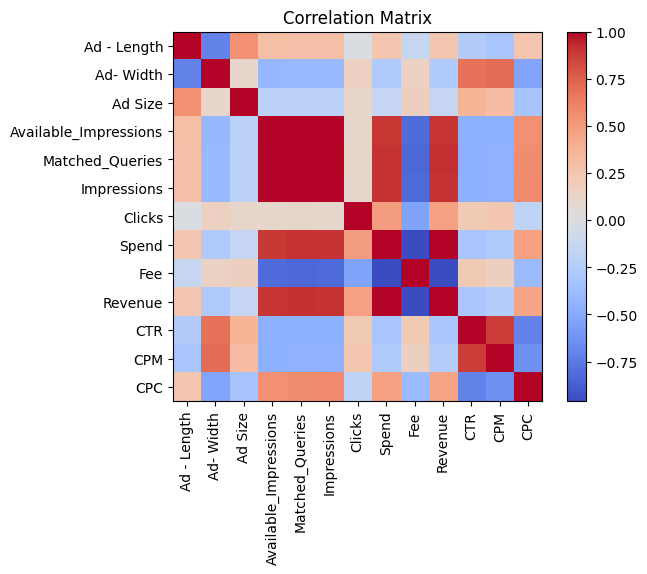

In [19]:
# Correlation matrix
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


In [20]:
# Drop categorical values
data = data.select_dtypes(exclude=['object'])
data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN


In [21]:
# Check for null values
print("Null Values:")
print(data.isnull().sum())


Null Values:
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64


In [22]:
# treat missing values

def impute_missing(data, col1, col2, col3):
    data[col1] = data[col1].fillna((data[col1].mean()))
    data[col2] = data[col2].fillna((data[col2].mean()))
    data[col3] = data[col3].fillna((data[col3].mean()))

    return data

impute_missing(data, 'CPC', 'CTR', 'CPM')

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.003100,0.000000,0.000000
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.003500,0.000000,0.000000
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.002800,0.000000,0.000000
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.002000,0.000000,0.000000
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.004100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,0.073661,7.672045,0.351061
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,0.073661,7.672045,0.351061
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061


In [23]:
# Check for null values after treating missing values
print("Null Values:")
print(data.isnull().sum())


Null Values:
Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64


In [24]:
# Summary statistics of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


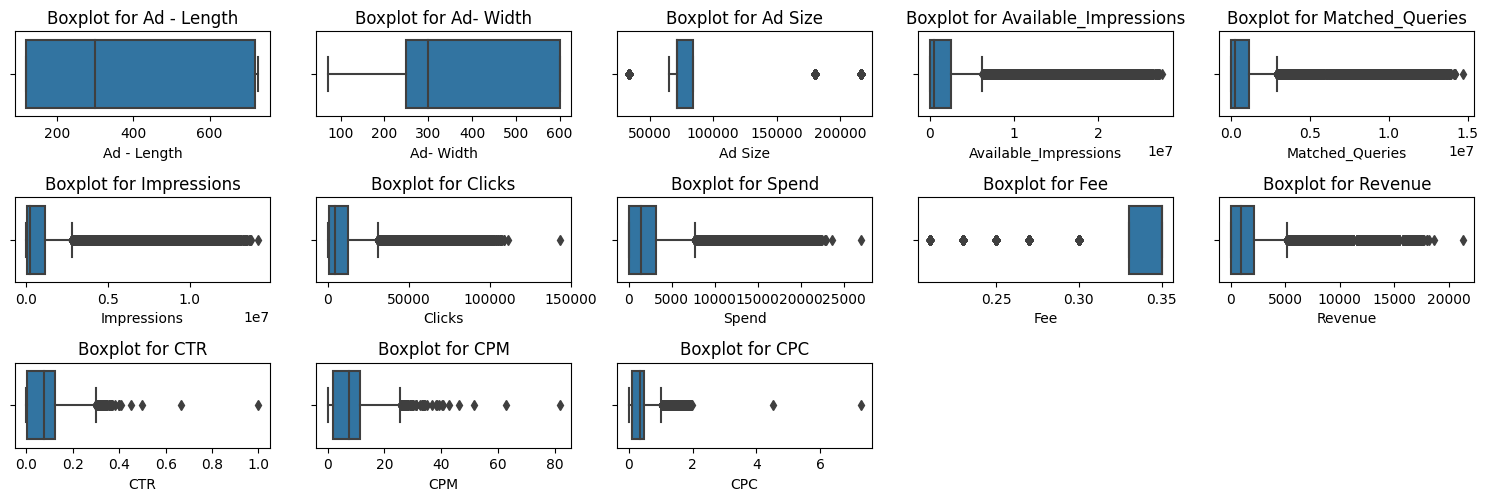

In [26]:
#checking outliers
num_cols_per_row = 5
num_cols = len(data.columns)
num_rows = (num_cols // num_cols_per_row) + (num_cols % num_cols_per_row)

# Create box plots for each column
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [28]:
# Function to detect and treat outliers using IQR
def treat_outliers_iqr(data, threshold=1.5):
    # Calculate the IQR for each column
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify and treat outliers
    data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

    return data_no_outliers

# Treat outliers using IQR
data_no_outliers = treat_outliers_iqr(data)

# Display the DataFrame after treating outliers
print("DataFrame after treating outliers:")
data_no_outliers


DataFrame after treating outliers:


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.003100,0.000000,0.000000
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.003500,0.000000,0.000000
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.002800,0.000000,0.000000
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.002000,0.000000,0.000000
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.004100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,120,600,72000,2,2,2,1,1.43,0.35,0.9295,0.073661,7.672045,0.351061
23056,120,600,72000,2,2,2,1,0.10,0.35,0.0650,0.073661,7.672045,0.351061
23057,120,600,72000,5,2,2,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061
23060,120,600,72000,4,4,4,1,0.14,0.35,0.0910,0.073661,7.672045,0.351061


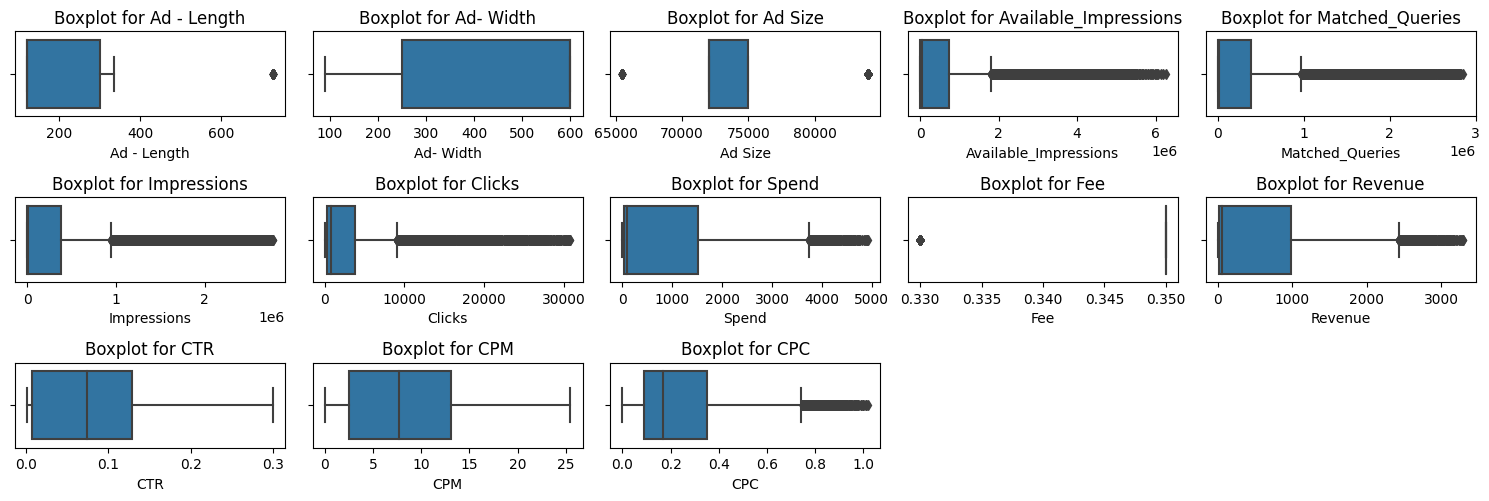

In [29]:
num_cols = len(data_no_outliers.columns)
num_rows = (num_cols // 5) + (num_cols % 5)

# Create box plots for each column after treating outliers
plt.figure(figsize=(15, 8))
for i, column in enumerate(data_no_outliers.columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(x=data_no_outliers[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [30]:
# z-score scaling

from sklearn.preprocessing import StandardScaler

# Use StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Display summary statistics of the scaled data
print("Summary statistics of the scaled data:")
data_scaled_df.describe().transpose()

Summary statistics of the scaled data:


,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-3.644957e-01,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-1.865987e-01,1.290590,1.290590
Ad Size,23066.0,2.464381e-17,1.000022,-1.024985,-0.400970,-4.009697e-01,-0.205965,1.939086
Available_Impressions,23066.0,-1.971505e-17,1.000022,-0.512788,-0.505688,-4.107866e-01,0.020171,5.305072
Matched_Queries,23066.0,-5.914515e-17,1.000022,-0.515377,-0.508102,-4.126727e-01,-0.045524,5.335208
Impressions,23066.0,-1.971505e-17,1.000022,-0.511050,-0.507761,-4.183138e-01,-0.053138,5.331990
Clicks,23066.0,-3.943010e-17,1.000022,-0.615311,-0.574454,-3.603704e-01,0.121894,7.628089
Spend,23066.0,-3.943010e-17,1.000022,-0.665372,-0.644432,-3.150323e-01,0.101964,5.955310
Fee,23066.0,6.703117e-16,1.000022,-3.914682,-0.160285,4.654474e-01,0.465447,0.465447
Revenue,23066.0,7.886020e-17,1.000022,-0.619693,-0.601863,-3.213727e-01,0.053809,6.232161


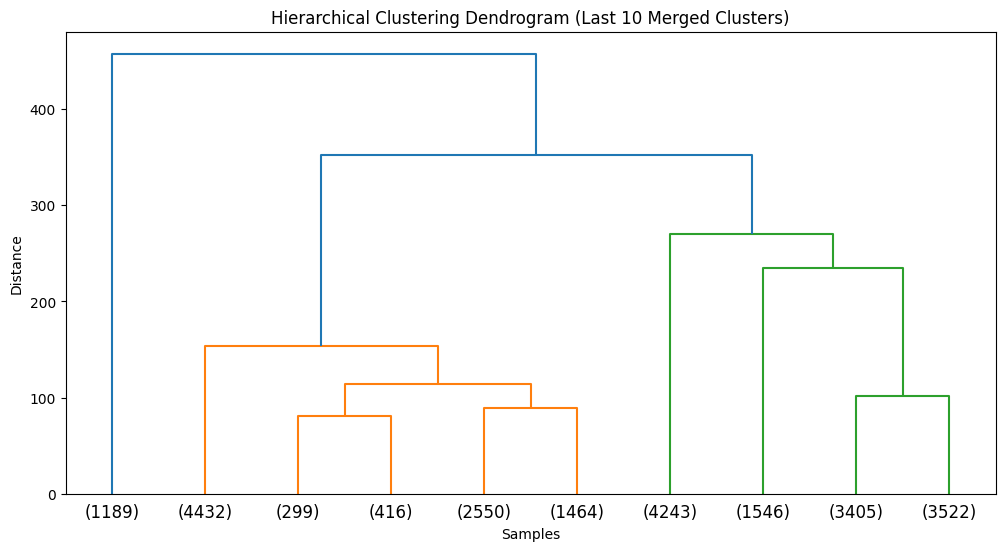

In [33]:
# Hierarchical clustering - Dendrogram
link = linkage(data_scaled_df, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(link, truncate_mode='lastp', p=10)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram (Last 10 Merged Clusters)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

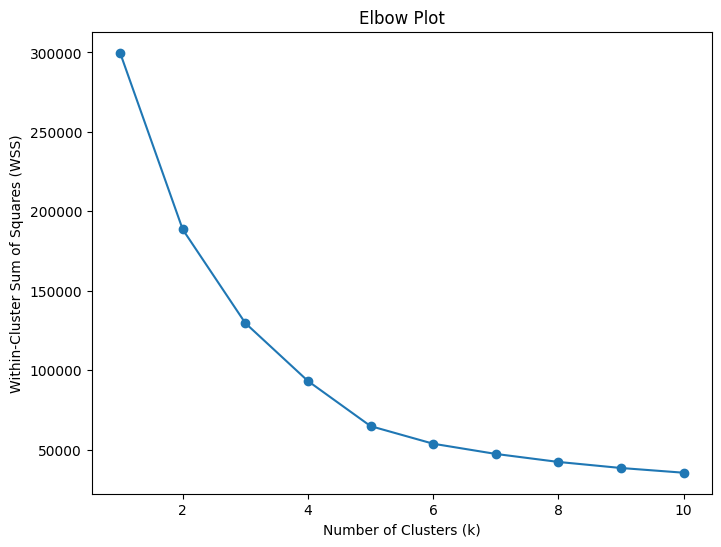

In [34]:
# Initializing an empty list to store the within-cluster sum of squares (WSS) values
wss = []

# Performing k-means clustering for different values of k and calculating the WSS
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    wss.append(kmeans.inertia_)

# Create Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Plot')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

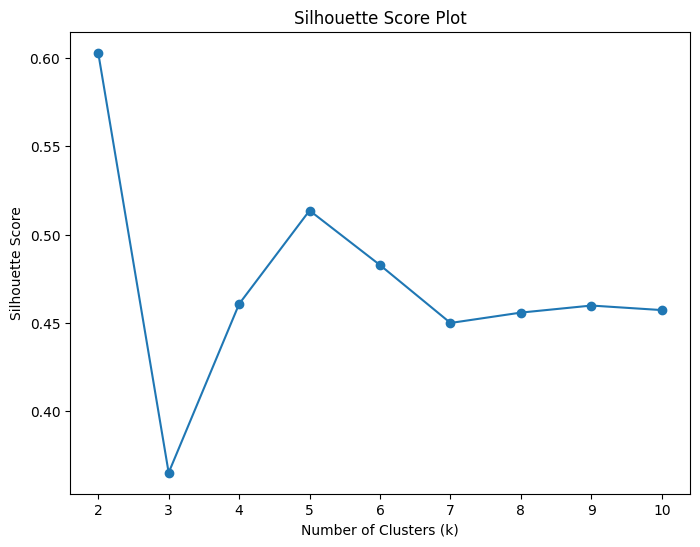

In [35]:
# Initializing an empty list to store the Silhouette scores
silhouette_scores = []

# Performing k-means clustering for different values of k and calculating the Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled_df)
    score = silhouette_score(data_scaled_df, labels)
    silhouette_scores.append(score)

# Create the Silhouette score plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot')
plt.show()

In [36]:
# Initializing an empty list to store the Silhouette scores
silhouette_scores = []

# Performing k-means clustering for different values of k and calculate the Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled_df)
    score = silhouette_score(data_scaled_df, labels)
    silhouette_scores.append(score)

# Print the Silhouette scores
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Number of Clusters (k) = {k}: Silhouette Score = {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of Clusters (k) = 2: Silhouette Score = 0.602856419557812
Number of Clusters (k) = 3: Silhouette Score = 0.3652575679239419
Number of Clusters (k) = 4: Silhouette Score = 0.46072044314349486
Number of Clusters (k) = 5: Silhouette Score = 0.5135883146481809
Number of Clusters (k) = 6: Silhouette Score = 0.48271573962694464
Number of Clusters (k) = 7: Silhouette Score = 0.44997366925914933
Number of Clusters (k) = 8: Silhouette Score = 0.45584674165165107
Number of Clusters (k) = 9: Silhouette Score = 0.45983041055564045
Number of Clusters (k) = 10: Silhouette Score = 0.45726048689932824


In [37]:


# Initialize variables to store the optimal number of clusters and the maximum Silhouette score
optimal_clusters = 0
max_score = -1

# Perform k-means clustering for different values of k and calculate the Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled_df)
    score = silhouette_score(data_scaled_df, labels)

    # Update the optimal number of clusters  if necessary
    if score > max_score:
        max_score = score
        optimal_clusters = k

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters is: 2


In [38]:
# Group the data by KMeans cluster labels and compute mean and median
mean = data.groupby(labels).mean()
median = data.groupby(labels).median()

# Rename the index values of the mean and median data frames
mean.index = [f'Group {label} Mean' for label in mean.index]
median.index = [f'Group {label} Median' for label in median.index]

# Concatenate the mean and median data frames
df_kmeans = pd.concat([mean, median], axis=0)

# Print the resulting data frame
df_kmeans.transpose()

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 3 Mean,Group 4 Mean,Group 5 Mean,Group 6 Mean,Group 7 Mean,Group 8 Mean,Group 9 Mean,Group 0 Median,Group 1 Median,Group 2 Median,Group 3 Median,Group 4 Median,Group 5 Median,Group 6 Median,Group 7 Median,Group 8 Median,Group 9 Median
Ad - Length,156.281879,4.602083e+02,6.883874e+02,719.407059,142.103837,6.810192e+02,3.078036e+02,155.016949,3.066364e+02,6.837062e+02,120.0000,4.800000e+02,7.280000e+02,720.00000,120.0000,7.280000e+02,3.000000e+02,120.00000,3.000000e+02,7.280000e+02
Ad- Width,552.231544,9.506718e+01,1.126634e+02,300.423529,572.084274,1.183960e+02,2.574462e+02,556.332392,2.854119e+02,1.113033e+02,600.0000,7.000000e+01,9.000000e+01,300.00000,600.0000,9.000000e+01,2.500000e+02,600.00000,2.500000e+02,9.000000e+01
Ad Size,77641.610738,4.013214e+04,6.921414e+04,215949.176471,75882.618510,7.032792e+04,7.844806e+04,78598.870056,8.713587e+04,6.888853e+04,72000.0000,3.360000e+04,6.552000e+04,216000.00000,72000.0000,6.552000e+04,7.500000e+04,72000.00000,7.500000e+04,6.552000e+04
Available_Impressions,63919.919463,1.795831e+06,1.108150e+07,244576.515059,879362.953348,2.064917e+07,6.222156e+06,54756.335923,2.049759e+06,3.361497e+06,11703.0000,1.780796e+06,1.128516e+07,205542.50000,903485.0000,2.078829e+07,5.848442e+06,20396.00000,2.148960e+06,2.938196e+06
Matched_Queries,46448.469463,7.879848e+05,6.224730e+06,133777.925647,614085.936795,1.090558e+07,3.445070e+06,28209.414548,1.128255e+06,1.953019e+06,7219.0000,8.188120e+05,6.363874e+06,133674.00000,625176.0000,1.093371e+07,3.393515e+06,11293.50000,1.135732e+06,1.741550e+06
Impressions,38079.357383,7.451069e+05,5.972654e+06,113532.672471,518172.282167,1.050808e+07,3.373573e+06,19935.144303,1.102550e+06,1.856322e+06,3281.5000,7.722745e+05,6.101200e+06,112972.50000,529386.0000,1.055997e+07,3.323562e+06,5018.50000,1.094122e+06,1.644069e+06
Clicks,5586.102349,3.664201e+03,1.039844e+04,14065.925647,70852.165538,2.025205e+04,8.156861e+03,2275.576036,2.943518e+03,2.338758e+03,525.0000,3.887000e+03,1.041600e+04,14351.50000,71971.0000,2.025000e+04,7.941500e+03,498.00000,3.114000e+03,1.921500e+03
Spend,647.114181,1.358616e+03,1.068651e+04,1216.360191,7453.693198,1.732726e+04,4.687321e+03,225.821994,2.001914e+03,3.336949e+03,55.2200,1.475205e+03,9.828400e+03,1308.67000,7507.9600,1.722371e+04,4.638680e+03,52.58500,1.968500e+03,2.797215e+03
Fee,0.348752,3.497265e-01,2.604600e-01,0.349539,0.281881,2.305316e-01,3.202245e-01,0.349798,3.460730e-01,3.357820e-01,0.3500,3.500000e-01,2.700000e-01,0.35000,0.2700,2.300000e-01,3.300000e-01,0.35000,3.500000e-01,3.500000e-01
Revenue,425.603074,8.840473e+02,7.929213e+03,792.193642,5379.641552,1.335610e+04,3.195138e+03,147.637237,1.314820e+03,2.240893e+03,35.8950,9.588800e+02,7.174732e+03,850.63575,5480.8100,1.326226e+04,3.107910e+03,34.17875,1.279530e+03,1.818190e+03
